In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'your file processed').drop(["Unnamed: 0"], axis = "columns")

In [2]:
data = data.drop(["playerId", "teamId", "competitionId", "refId"], axis = "columns")

In [4]:
X = data.drop("card_y", axis = 1)
y = data["card_y"]

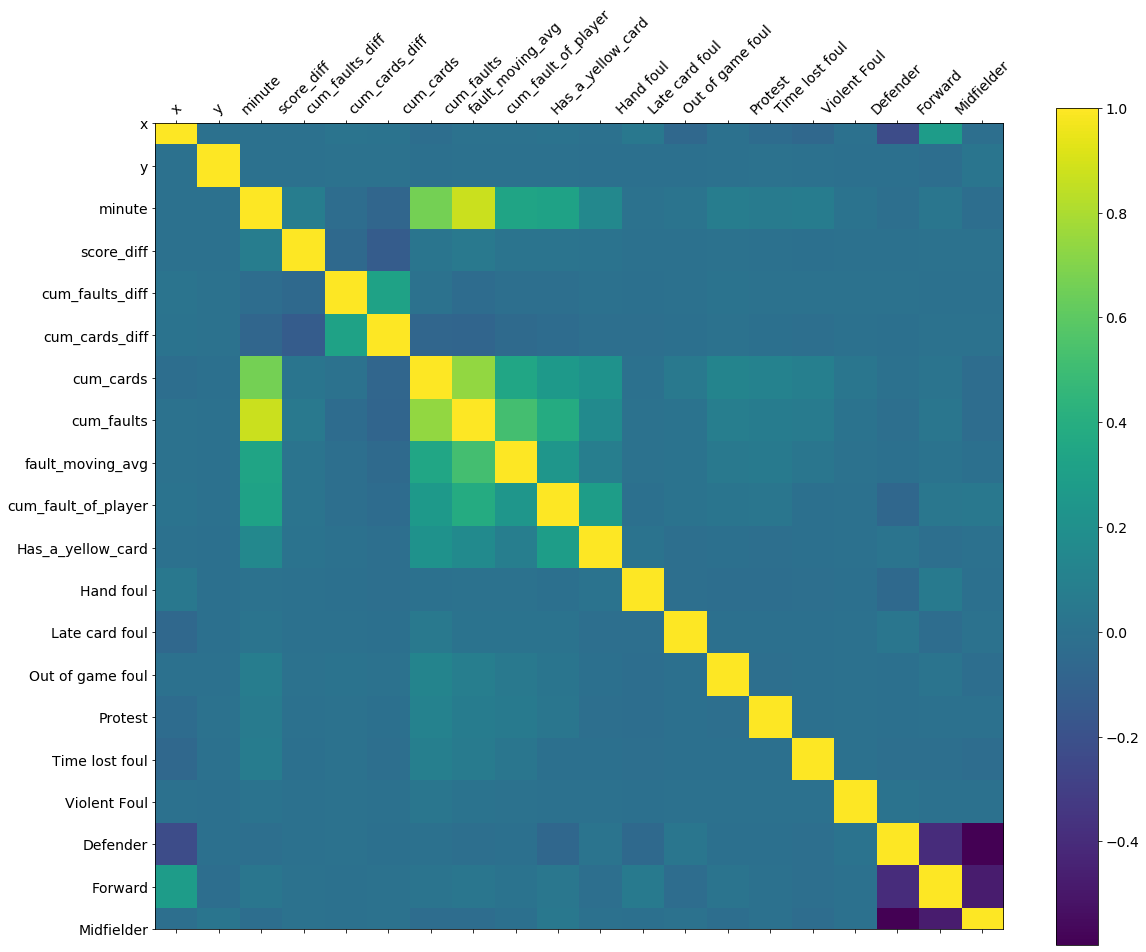

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(19,15))
plt.matshow(X.corr(), fignum = f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=45)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [5]:
corr = X.corr()

In [21]:
print(X.corr()[(X.corr() > 0.3)])

                       x    y    minute  score_diff  cum_faults_diff  \
x                    1.0  NaN       NaN         NaN              NaN   
y                    NaN  1.0       NaN         NaN              NaN   
minute               NaN  NaN  1.000000         NaN              NaN   
score_diff           NaN  NaN       NaN         1.0              NaN   
cum_faults_diff      NaN  NaN       NaN         NaN         1.000000   
cum_cards_diff       NaN  NaN       NaN         NaN         0.324349   
cum_cards            NaN  NaN  0.667211         NaN              NaN   
cum_faults           NaN  NaN  0.874776         NaN              NaN   
fault_moving_avg     NaN  NaN  0.334013         NaN              NaN   
cum_fault_of_player  NaN  NaN  0.324262         NaN              NaN   
Has_a_yellow_card    NaN  NaN       NaN         NaN              NaN   
Hand foul            NaN  NaN       NaN         NaN              NaN   
Late card foul       NaN  NaN       NaN         NaN             

In [23]:
print(X.corr()[(X.corr() < -0.3)])

                      x   y  minute  score_diff  cum_faults_diff  \
x                   NaN NaN     NaN         NaN              NaN   
y                   NaN NaN     NaN         NaN              NaN   
minute              NaN NaN     NaN         NaN              NaN   
score_diff          NaN NaN     NaN         NaN              NaN   
cum_faults_diff     NaN NaN     NaN         NaN              NaN   
cum_cards_diff      NaN NaN     NaN         NaN              NaN   
cum_cards           NaN NaN     NaN         NaN              NaN   
cum_faults          NaN NaN     NaN         NaN              NaN   
fault_moving_avg    NaN NaN     NaN         NaN              NaN   
cum_fault_of_player NaN NaN     NaN         NaN              NaN   
Has_a_yellow_card   NaN NaN     NaN         NaN              NaN   
Hand foul           NaN NaN     NaN         NaN              NaN   
Late card foul      NaN NaN     NaN         NaN              NaN   
Out of game foul    NaN NaN     NaN         NaN 

In [8]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [9]:
vif.to_excel("vif_matrix.xlsx")

In [10]:
"Normalizing Data for PCA application"
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [11]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)



In [12]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
eig_val_sorted = []
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    eig_val_sorted.append(i[0])

Eigenvalues in descending order:
3.110341826050093
1.6658814309863026
1.5723440056772333
1.3601967042463043
1.1162090401706835
1.0162437368548647
1.0138640877817304
1.007980721002947
1.003264287535213
0.9887646879122044
0.9854315092103328
0.9644490668741944
0.9112150524216219
0.7697042396910498
0.7542390311586783
0.6651664625649301
0.6562627922040403
0.33141946264236494
0.09074555042155441
0.01669337094892029


In [14]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.plot(eig_val_sorted, 'ro-', linewidth=2)
plt.xticks(np.arange(0, len(eig_val_sorted), 1.0))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg.get_frame().set_alpha(0.4)
plt.show()

NameError: name 'leg' is not defined

In [15]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

print("hello")
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,21)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,21)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)
fig = dict(data=data, layout=layout)
#py.iplot(fig, filename='selecting-principal-components.png')

hello


In [16]:
#https://plotly.com/python/v3/ipython-notebooks/principal-component-analysis/
py.iplot(fig)